In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")

In [234]:
df = pd.read_csv('airline_passenger.csv')

In [235]:
df.duplicated().sum()

0

In [236]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [237]:
df.dropna(subset='Arrival Delay',inplace=True)

In [238]:
df_complaint = df.copy()

---

In [239]:
rows = len(df)
target_boarding = 0.35
target_cabin = 0.25
target_delay = 0.2
target_seat = 0.15
target_food = 0.05

print("Slow Boarding: ",int(rows * target_boarding))
print("Unsatisfactory Cabin Service: ",int(rows * target_cabin))
print("Delay Time: ",int(rows * target_delay))
print("Seat/Comfort: ",int(rows * target_seat))
print("Food inquality: ",int(rows * target_food))

Slow Boarding:  45320
Unsatisfactory Cabin Service:  32371
Delay Time:  25897
Seat/Comfort:  19423
Food inquality:  6474


In [240]:
def fill_slow(row):
    if row['On-board Service'] <= 3:
        return 0
    else:
        return 1

df_complaint['Boarding'] = df_complaint.apply(fill_slow, axis=1)

In [241]:
df_complaint["Boarding"].value_counts()

1    67994
0    61493
Name: Boarding, dtype: int64

In [242]:
df_complaint_boarding_0 = df[df_complaint['Boarding']==0]

In [243]:
resample_boarding = int(0.35 * rows)
resample_boarding

45320

In [244]:
df_boarding_sample = df_complaint_boarding_0.sample(n=resample_boarding,random_state=42)
len(df_boarding_sample)

45320

---

In [245]:
def fill_cabin(row):
    if row['In-flight Service'] <= 3:
        return 0
    else:
        return 1

df_complaint['Cabin'] = df_complaint.apply(fill_cabin, axis=1)

In [246]:
df_complaint["Cabin"].value_counts()

1    81160
0    48327
Name: Cabin, dtype: int64

In [247]:
df_complaint_cabin_0 = df[df_complaint['Cabin']==0]

In [248]:
resample_cabin = int(0.25 * rows)
resample_cabin

32371

In [249]:
df_cabin_sample = df_complaint_cabin_0.sample(n=resample_cabin,random_state=42)
len(df_cabin_sample)

32371

---

In [250]:
def fill_delay(row):
    if row['Departure and Arrival Time Convenience'] <= 1:
        return 0
    else:
        return 1

df_complaint['Delay'] = df_complaint.apply(fill_delay, axis=1)

In [251]:
df_complaint["Delay"].value_counts()

1    103472
0     26015
Name: Delay, dtype: int64

In [252]:
df_complaint_delay_0 = df[df_complaint['Delay']==0]

In [253]:
resample_delay = int(0.2 * rows)
resample_delay

25897

In [254]:
df_delay_sample = df_complaint_delay_0.sample(n=resample_delay,random_state=42)
len(df_delay_sample)

25897

---

In [255]:
def fill_seat(row):
    if row['Seat Comfort'] <= 2:
        return 0
    else:
        return 1

df_complaint['Seat'] = df_complaint.apply(fill_seat, axis=1)

In [256]:
df_complaint["Seat"].value_counts()

1    95965
0    33522
Name: Seat, dtype: int64

In [257]:
df_complaint_seat_0 = df[df_complaint['Seat']==0]

In [258]:
resample_seat = int(0.15 * rows)
resample_seat

19423

In [259]:
df_seat_sample = df_complaint_seat_0.sample(n=resample_seat,random_state=42)
len(df_seat_sample)

19423

---

In [260]:
def fill_food(row):
    if row['Food and Drink'] <= 1:
        return 0
    else:
        return 1

df_complaint['Food'] = df_complaint.apply(fill_food, axis=1)

In [261]:
df_complaint["Food"].value_counts()

1    113347
0     16140
Name: Food, dtype: int64

In [262]:
df_complaint_food_0 = df[df_complaint['Food']==0]

In [263]:
resample_food = int(0.05 * rows)
resample_food

6474

In [264]:
df_food_sample = df_complaint_food_0.sample(n=resample_food,random_state=42)
len(df_food_sample)

6474

---

In [265]:
df_boarding_sample["Complaint"] = "Slow Boarding"
df_cabin_sample["Complaint"] = "Unsatisfacory Cabin Service"
df_delay_sample["Complaint"] = "Delay Time"
df_seat_sample["Complaint"] = "Discomfort Seat"
df_food_sample["Complaint"] = "Food Quality"

In [266]:
df_new = pd.concat([df_boarding_sample, df_cabin_sample,df_delay_sample,df_seat_sample,df_food_sample], ignore_index=True)

In [267]:
df_new.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Complaint
0,72083,Female,69,Returning,Business,Business,2673,7,0.0,3,...,4,3,1,5,3,3,3,3,Neutral or Dissatisfied,Slow Boarding
1,59995,Female,49,Returning,Personal,Economy,1085,1,0.0,5,...,5,2,3,5,1,2,1,2,Neutral or Dissatisfied,Slow Boarding
2,96236,Male,76,Returning,Business,Economy,460,0,0.0,1,...,1,2,1,1,3,1,1,4,Neutral or Dissatisfied,Slow Boarding
3,122638,Female,22,Returning,Business,Economy Plus,728,9,12.0,1,...,3,3,2,2,3,2,2,4,Neutral or Dissatisfied,Slow Boarding
4,14269,Male,42,Returning,Business,Economy,429,31,24.0,2,...,5,2,5,5,3,5,5,3,Satisfied,Slow Boarding


In [268]:
new_portion = df_new["Complaint"].value_counts(normalize=True)
portion = new_portion.round(2)
portion


Slow Boarding                  0.35
Unsatisfacory Cabin Service    0.25
Delay Time                     0.20
Discomfort Seat                0.15
Food Quality                   0.05
Name: Complaint, dtype: float64

In [269]:
data_portion = {
    'Category': ['Slow Boarding', 'Unsatisfactory Cabin Service', 'Delay Time', 'Discomfort Seat', 'Food Quality'],
    'Weight': [0.35, 0.25, 0.20, 0.15, 0.05]
}

df_portions = pd.DataFrame(data_portion)

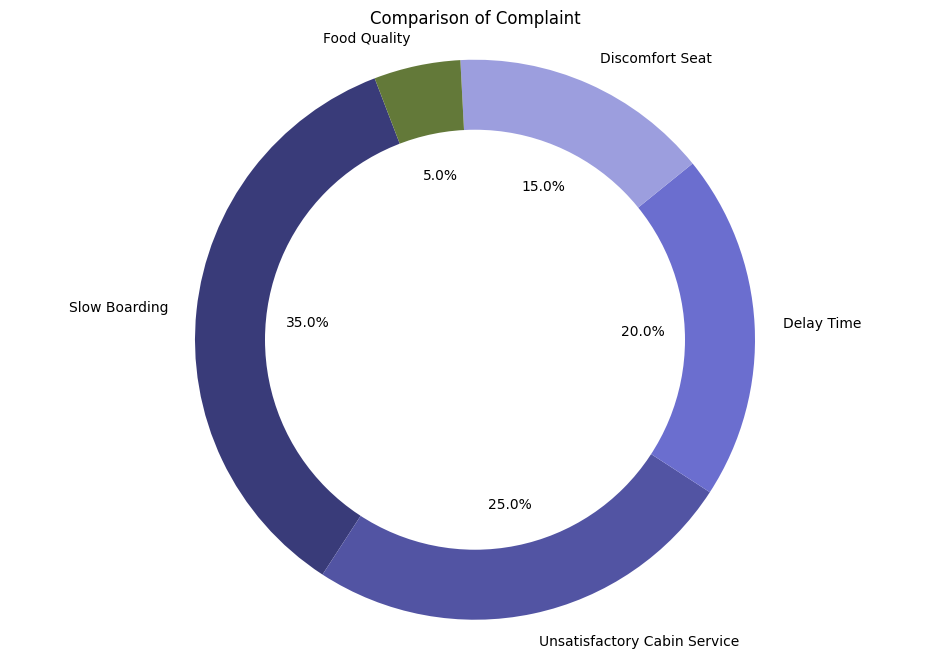

In [270]:
plt.figure(figsize=(12,8))

plt.pie(df_portions['Weight'], labels=df_portions['Category'], startangle=111, autopct='%1.1f%%', colors=sns.color_palette('tab20b'))
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Comparison of Complaint');

In [271]:
df_reproduced = df_new.copy()
df_reproduced.drop(columns=['On-board Service','In-flight Service','Departure and Arrival Time Convenience','Seat Comfort','Food and Drink'],inplace=True)

In [272]:
# df_reproduced.to_csv("airline_z.csv")

---

In [273]:
df_reproduced.head(3)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,Leg Room Service,Cleanliness,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Complaint
0,72083,Female,69,Returning,Business,Business,2673,7,0.0,3,2,4,3,3,1,3,3,3,Neutral or Dissatisfied,Slow Boarding
1,59995,Female,49,Returning,Personal,Economy,1085,1,0.0,2,3,4,3,2,3,2,1,2,Neutral or Dissatisfied,Slow Boarding
2,96236,Male,76,Returning,Business,Economy,460,0,0.0,4,4,1,4,2,1,1,1,4,Neutral or Dissatisfied,Slow Boarding


In [274]:
df_reproduced['Flight Distance'].describe()

count    129485.000000
mean       1085.052632
std         941.870543
min          31.000000
25%         391.000000
50%         746.000000
75%        1529.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [275]:
age_bins = [0,17, 25, 35, 45, 55, 65, 75, 86]
df_reproduced['Age_group'] = pd.cut(df_reproduced['Age'], bins=age_bins)

In [276]:
delay_distance_bins = [0, 500 ,1500, 3000, 6000]
delay_labels = ['Very Short (<500km)','Short (500km - 1500 km)', 'Moderate (1500 - 3000 km)', 'Long (>3000km)']
df_reproduced['Distance_Cat'] = pd.cut(df_reproduced['Flight Distance'], bins=delay_distance_bins,labels=delay_labels)

In [277]:
df_reproduced_boarding = df_reproduced[df_reproduced['Complaint']=="Slow Boarding"]
len(df_reproduced_boarding)

45320

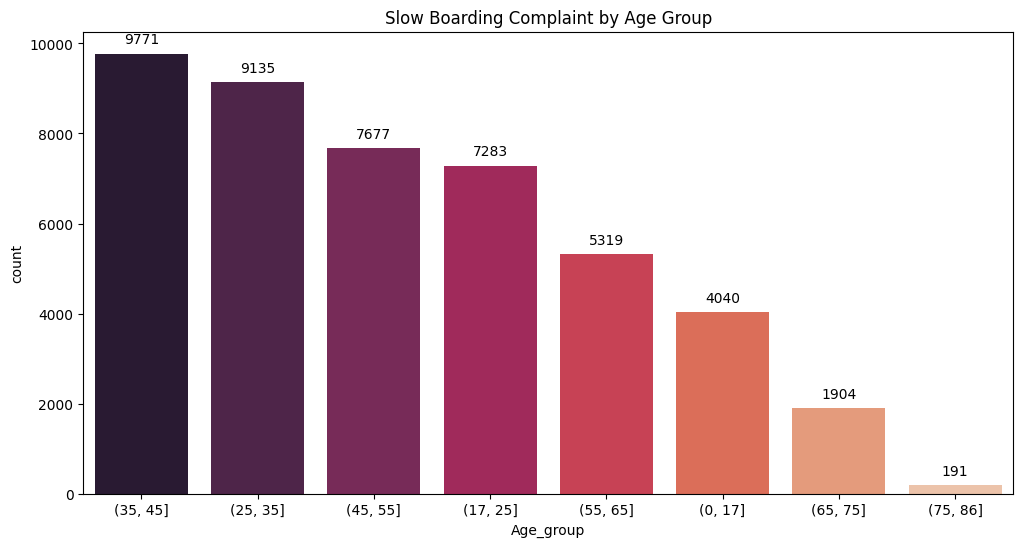

In [279]:
plt.figure(figsize=(12,6))
top_age_group = df_reproduced_boarding['Age_group'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_boarding, x='Age_group', order=top_age_group.index, palette='rocket')
plt.title('Slow Boarding Complaint by Age Group')
plt.xticks(rotation=0);

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), 
                     textcoords = 'offset points')

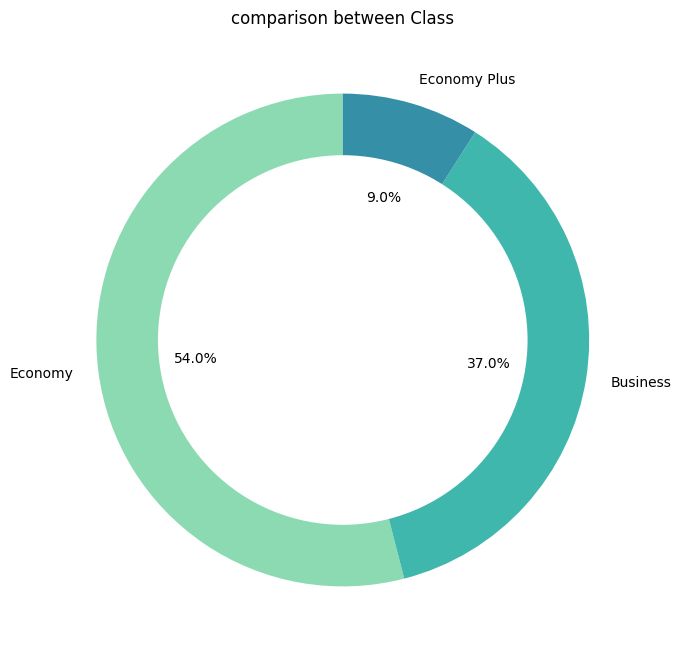

In [ ]:
plt.figure(figsize=(12,8))

plt.pie(df_reproduced_boarding["Class"].value_counts(),labels=(df_reproduced_boarding['Class'].value_counts().index), startangle= 90,autopct='%1.1f%%',colors=sns.color_palette('mako_r'))
# plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('comparison between Class');

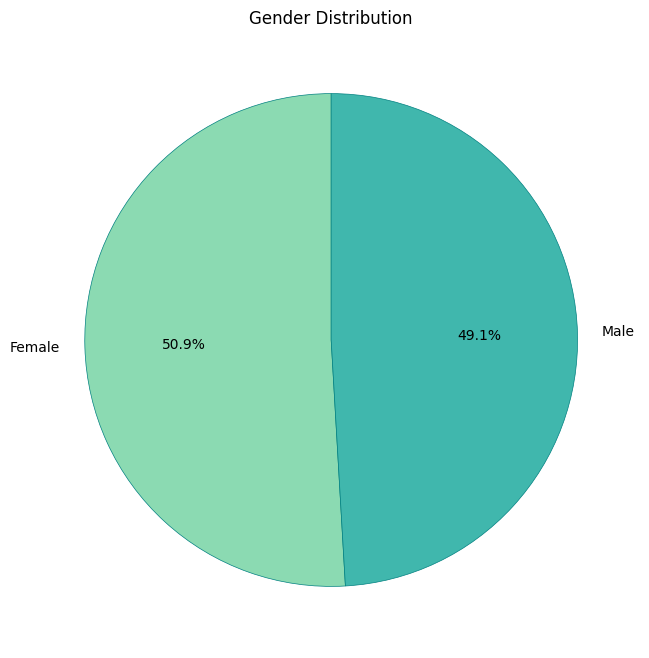

In [ ]:
plt.figure(figsize=(12,8))

plt.pie(df_reproduced_boarding["Gender"].value_counts(),labels=(df['Gender'].value_counts().index), startangle= 90, wedgeprops={"linewidth":0.5,'edgecolor':'teal'},autopct='%1.1f%%',colors=sns.color_palette('mako_r'))
plt.title('Gender Distribution');

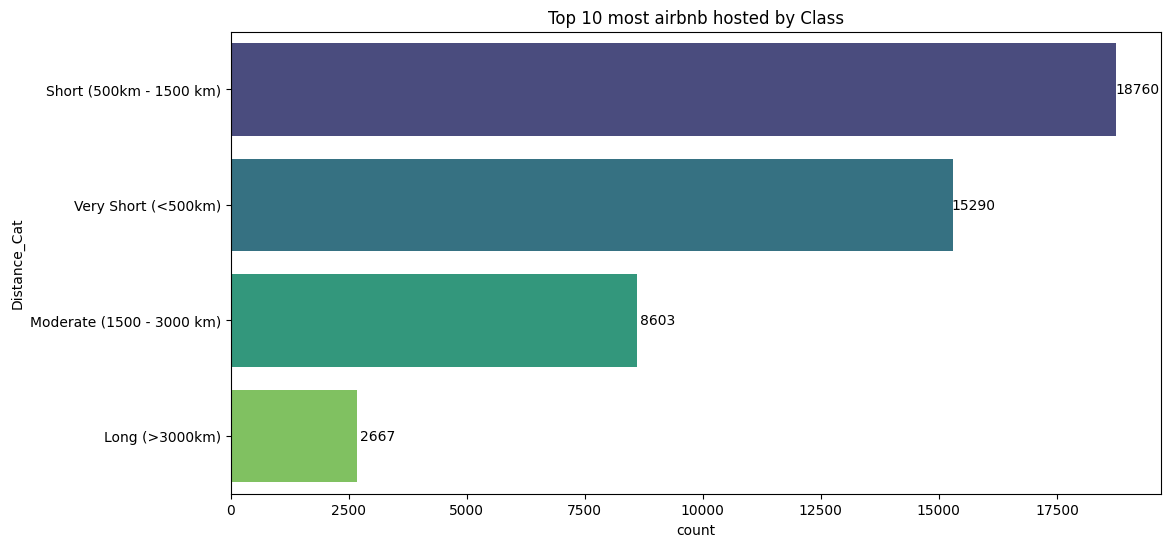

In [ ]:
plt.figure(figsize=(12,6))
top_class = df_reproduced_boarding['Distance_Cat'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_boarding, y='Distance_Cat', order=top_class.index, palette='viridis')

for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha = 'center', va = 'center',
                     xytext = (15, 0),
                     textcoords = 'offset points')
plt.title('Top 10 most airbnb hosted by Class')
plt.xticks(rotation=0);

In [ ]:
df_reproduced_boarding['Distance_Cat'].value_counts()

Short (500km - 1500 km)      18760
Very Short (<500km)          15290
Moderate (1500 - 3000 km)     8603
Long (>3000km)                2667
Name: Distance_Cat, dtype: int64

In [ ]:
df_reproduced_boarding['Flight Distance'].max()

4983

---
---
---

# 1. Slow Boarding Complaint

In [280]:
df_reproduced_boarding = df_reproduced[df_reproduced['Complaint']=="Slow Boarding"]
len(df_reproduced_boarding)

45320

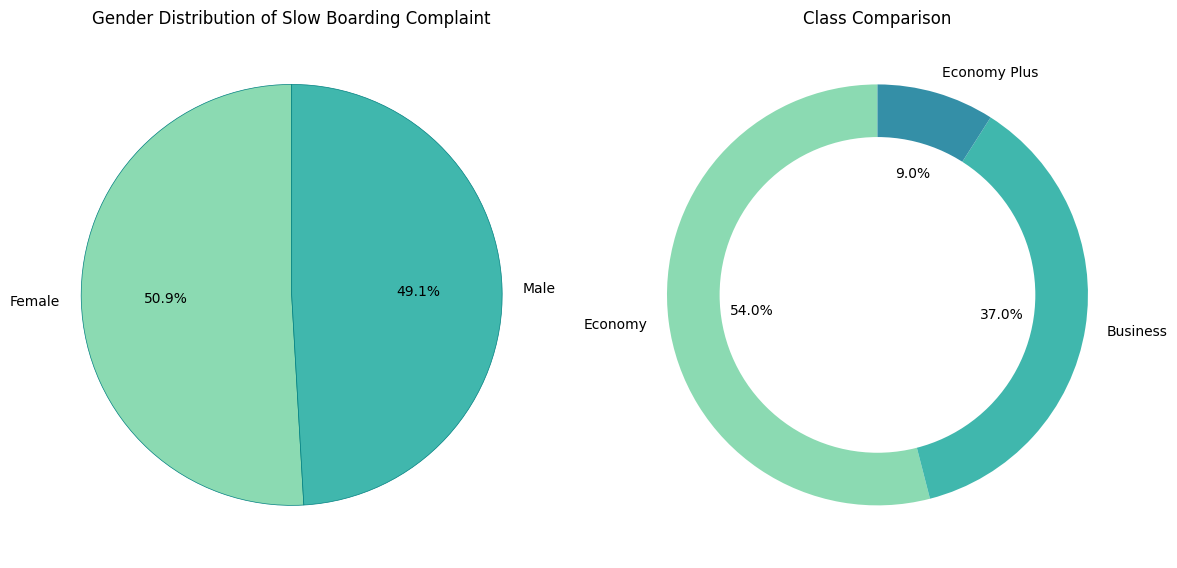

In [281]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.pie(df_reproduced_boarding["Gender"].value_counts(),labels=(df['Gender'].value_counts().index), startangle= 90, wedgeprops={"linewidth":0.5,'edgecolor':'teal'},autopct='%1.1f%%',colors=sns.color_palette('mako_r'))
plt.title('Gender Distribution of Slow Boarding Complaint')

plt.subplot(1, 2, 2)
plt.pie(df_reproduced_boarding["Class"].value_counts(),labels=(df_reproduced_boarding['Class'].value_counts().index), startangle= 90,autopct='%1.1f%%',colors=sns.color_palette('mako_r'))
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Class Comparison')

plt.tight_layout()
plt.show();

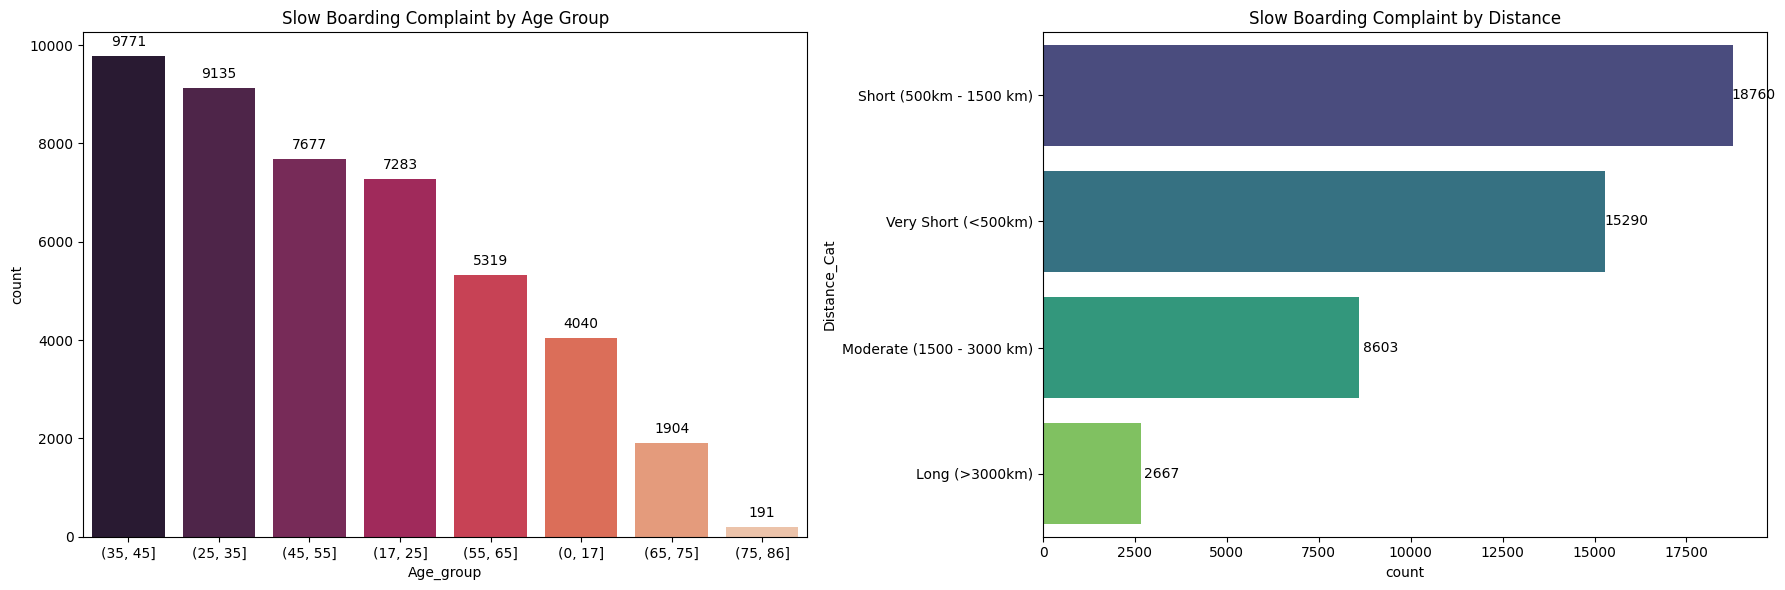

In [282]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
top_age_group = df_reproduced_boarding['Age_group'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_boarding, x='Age_group', order=top_age_group.index, palette='rocket')
plt.title('Slow Boarding Complaint by Age Group')
plt.xticks(rotation=0)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.subplot(1, 2, 2)
top_class = df_reproduced_boarding['Distance_Cat'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_boarding, y='Distance_Cat', order=top_class.index, palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha = 'center', va = 'center',
                     xytext = (15, 0),
                     textcoords = 'offset points')
plt.title('Slow Boarding Complaint by Distance')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show();

# 2. Unsatisfactory Cabin Service

In [ ]:
df_reproduced_cabin = df_reproduced[df_reproduced['Complaint']=="Unsatisfacory Cabin Service"]
len(df_reproduced_cabin)

32371

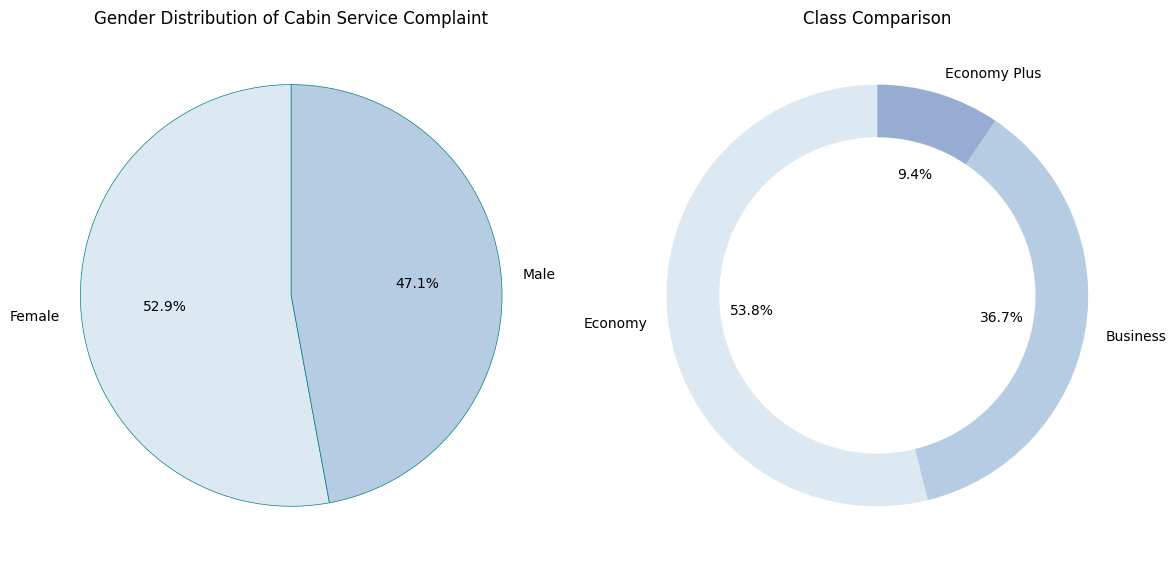

In [285]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.pie(df_reproduced_cabin["Gender"].value_counts(),labels=(df['Gender'].value_counts().index), startangle= 90, wedgeprops={"linewidth":0.5,'edgecolor':'teal'},autopct='%1.1f%%',colors=sns.color_palette('BuPu'))
plt.title('Gender Distribution of Cabin Service Complaint')

plt.subplot(1, 2, 2)
plt.pie(df_reproduced_cabin["Class"].value_counts(),labels=(df_reproduced_cabin['Class'].value_counts().index), startangle= 90,autopct='%1.1f%%',colors=sns.color_palette('BuPu'))
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Class Comparison')

plt.tight_layout()
plt.show();

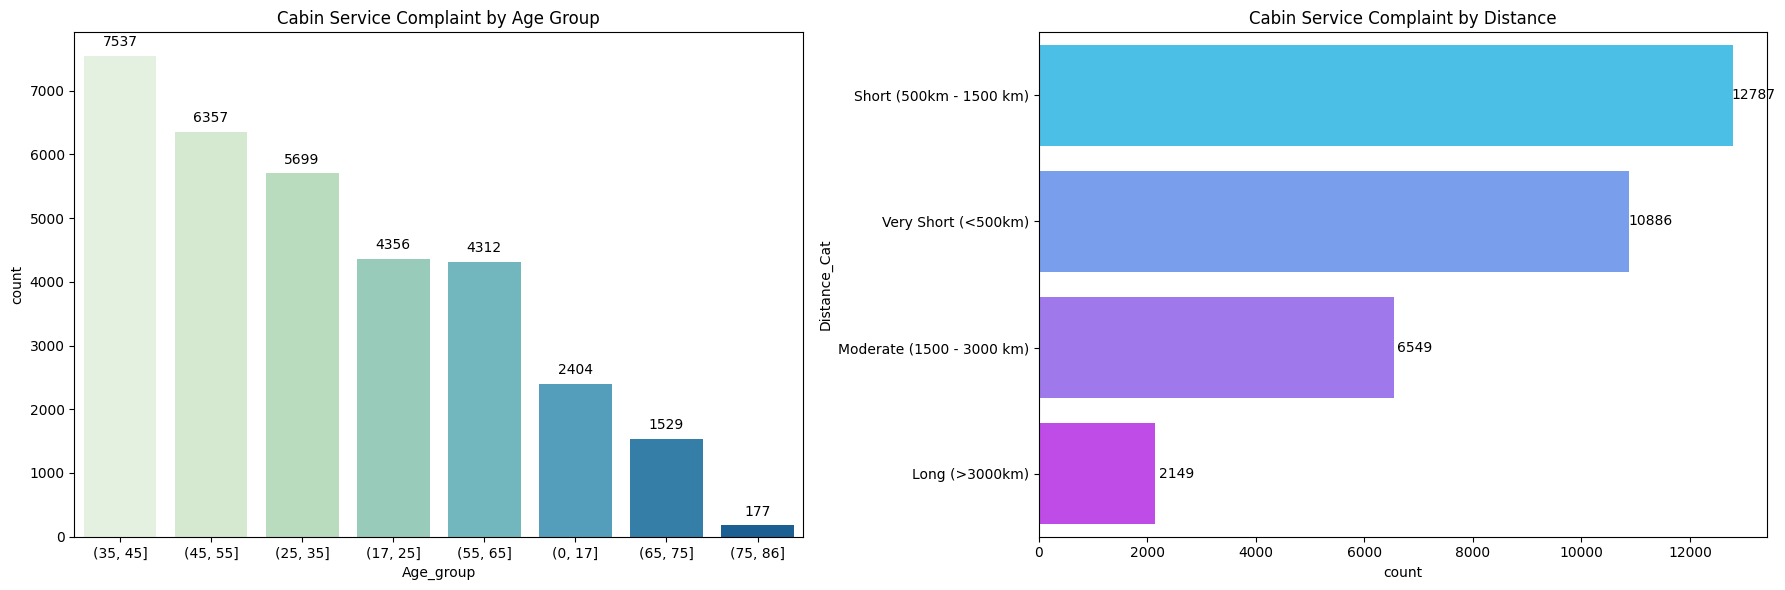

In [290]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
top_age_group = df_reproduced_cabin['Age_group'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_cabin, x='Age_group', order=top_age_group.index, palette='GnBu')
plt.title('Cabin Service Complaint by Age Group')
plt.xticks(rotation=0)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.subplot(1, 2, 2)
top_class = df_reproduced_cabin['Distance_Cat'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_cabin, y='Distance_Cat', order=top_class.index, palette='cool')
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha = 'center', va = 'center',
                     xytext = (15, 0),
                     textcoords = 'offset points')
plt.title('Cabin Service Complaint by Distance')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show();

# 3. Delay Time Complain

In [291]:
df_reproduced_delay = df_reproduced[df_reproduced['Complaint']=="Delay Time"]
len(df_reproduced_delay)

25897

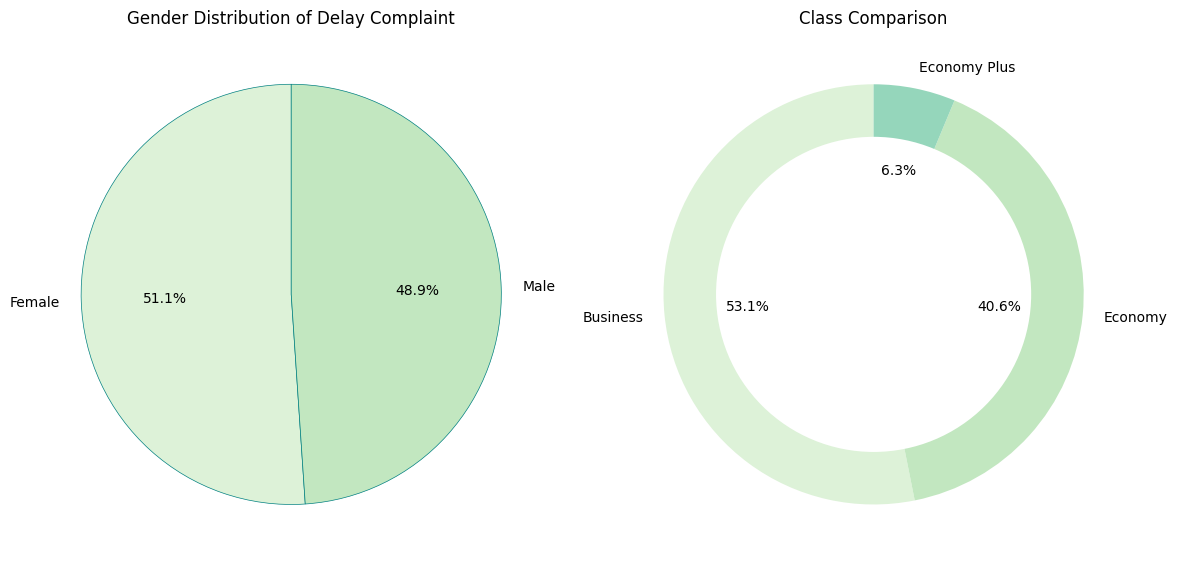

In [299]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.pie(df_reproduced_delay["Gender"].value_counts(),labels=(df['Gender'].value_counts().index), startangle= 90, wedgeprops={"linewidth":0.5,'edgecolor':'teal'},autopct='%1.1f%%',colors=sns.color_palette('GnBu'))
plt.title('Gender Distribution of Delay Complaint')

plt.subplot(1, 2, 2)
plt.pie(df_reproduced_delay["Class"].value_counts(),labels=(df_reproduced_delay['Class'].value_counts().index), startangle= 90,autopct='%1.1f%%',colors=sns.color_palette('GnBu'))
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Class Comparison')

plt.tight_layout()
plt.show();

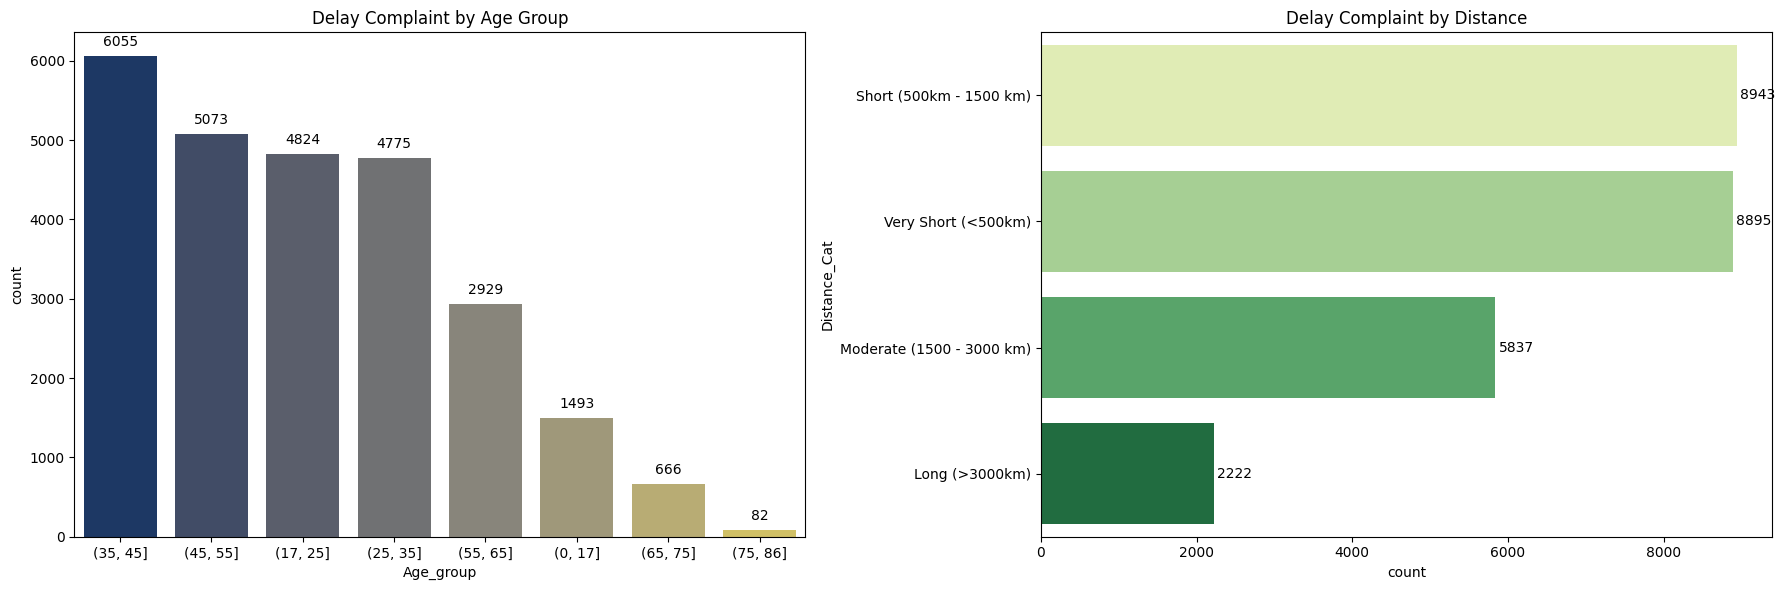

In [305]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
top_age_group = df_reproduced_delay['Age_group'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_delay, x='Age_group', order=top_age_group.index, palette='cividis')
plt.title('Delay Complaint by Age Group')
plt.xticks(rotation=0)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.subplot(1, 2, 2)
top_class = df_reproduced_delay['Distance_Cat'].value_counts().head(10)
barplot = sns.countplot(data=df_reproduced_delay, y='Distance_Cat', order=top_class.index, palette='YlGn')
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha = 'center', va = 'center',
                     xytext = (15, 0),
                     textcoords = 'offset points')
plt.title('Delay Complaint by Distance')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show();

---

## Statistics

In [ ]:
from scipy.stats import spearmanr, pearsonr, mannwhitneyu, ttest_ind

In [ ]:
df_reproduced['Satisfaction'] = df_reproduced['Satisfaction'].replace({'Satisfied': 1, 'Neutral or Dissatisfied': 0})

In [ ]:
df_reproduced

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Ease of Online Booking,...,Gate Location,Leg Room Service,Cleanliness,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Complaint,Age_group,Distance_Cat
0,72083,Female,69,Returning,Business,Business,2673,7,0.0,3,...,3,3,1,3,3,3,0,Slow Boarding,"(65, 75]",Moderate (1500 - 3000 km)
1,59995,Female,49,Returning,Personal,Economy,1085,1,0.0,2,...,3,2,3,2,1,2,0,Slow Boarding,"(45, 55]",Short (500km - 1500 km)
2,96236,Male,76,Returning,Business,Economy,460,0,0.0,4,...,4,2,1,1,1,4,0,Slow Boarding,"(75, 86]",Very Short (<500km)
3,122638,Female,22,Returning,Business,Economy Plus,728,9,12.0,1,...,1,3,2,2,2,4,0,Slow Boarding,"(17, 25]",Short (500km - 1500 km)
4,14269,Male,42,Returning,Business,Economy,429,31,24.0,2,...,2,2,5,5,5,3,1,Slow Boarding,"(35, 45]",Very Short (<500km)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129480,63729,Female,43,First-time,Business,Economy,160,0,4.0,2,...,3,1,1,2,1,4,0,Food Quality,"(35, 45]",Very Short (<500km)
129481,13305,Male,36,Returning,Business,Business,3846,0,0.0,2,...,2,4,1,4,4,4,0,Food Quality,"(35, 45]",Long (>3000km)
129482,11859,Male,29,First-time,Business,Business,912,9,5.0,1,...,4,3,1,1,1,5,0,Food Quality,"(25, 35]",Short (500km - 1500 km)
129483,21540,Female,16,Returning,Personal,Economy,331,65,99.0,5,...,5,1,1,2,1,4,0,Food Quality,"(0, 17]",Very Short (<500km)


In [ ]:
df_integer = df_reproduced.select_dtypes(include=[int,float])
df_integer.drop(columns=["ID","Age","Satisfaction"],inplace=True)

In [ ]:
def not_normal_dist(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.any()


In [ ]:
col_not_normaldist = [col for col in df_integer.columns if not_normal_dist(df_integer[col])]
col_normaldist = [col for col in df_integer.columns if not not_normal_dist(df_integer[col])]
df_not_normaldist = df_integer[col_not_normaldist]
df_normaldist = df_integer[col_normaldist]

In [ ]:
variable_param = df_normaldist.columns
variable_non_param = df_not_normaldist.columns
target_variable = 'Satisfaction'

statistic_table = []


for var in variable_param:
    statistic, p_value = ttest_ind(df_reproduced[df_reproduced[target_variable] == 0][var], df_reproduced[df_reproduced[target_variable] == 1][var])
    alpha = 0.05

    if p_value < alpha:
        status_h0 = "Reject"
    else:
        status_h0 = "ACCEPT"

    correlation, p_value = pearsonr(df_reproduced[var], df_reproduced[target_variable])

    if 0 < correlation < 0.1:
        corr_status = "Weak Positive correlation"
    elif correlation > 0.1:
        corr_status = "Positive correlation"
    elif -0.1 < correlation < 0:
        corr_status = "Weak Negative correlation"
    elif correlation < -0.1:
        corr_status = "Negative correlation"

    statistic_table.append({
        'Feature': var,
        'Assumption':"Normal Distribution",
        'Method': 'T-test_IND',
        'Score': p_value,
        'H0': status_h0,
        'Correlation Method': "Pearson",
        "Corr Score": correlation,
        "Corr Status" : corr_status
    })

for var in variable_non_param:
    statistic, p_value = mannwhitneyu(df_reproduced[df_reproduced[target_variable] == 0][var], df_reproduced[df_reproduced[target_variable] == 1][var])
    alpha = 0.05

    if p_value < alpha:
        status_h0 = "Reject"
    else:
        status_h0 = "Accept"
    
    correlation, p_value = spearmanr(df_reproduced[var], df_reproduced[target_variable])

    if 0 < correlation < 0.1:
        corr_status = "Weak Positive correlation"
    elif correlation > 0.1:
        corr_status = "Positive correlation"
    elif -0.1 < correlation < 0:
        corr_status = "Weak Negative correlation"
    elif correlation < -0.1:
        corr_status = "Negative correlation"

    statistic_table.append({
        'Feature': var,
        'Assumption':"Not Normal Distribution",
        'Method': 'mannwhitneyU',
        'Score': p_value,
        'H0': status_h0,
        'Correlation Method': "SpearmanR",
        "Corr Score": correlation,
        "Corr Status" : corr_status
    })
statistic_tables = pd.DataFrame(statistic_table)
statistic_tables.sort_values(by='Score', ascending=True)

,Feature,Assumption,Method,Score,H0,Correlation Method,Corr Score,Corr Status
1,Check-in Service,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,0.230155,Positive correlation
2,Online Boarding,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,0.426726,Positive correlation
3,Gate Location,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,-0.137705,Negative correlation
4,Leg Room Service,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,0.160332,Positive correlation
5,Cleanliness,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,0.300089,Positive correlation
6,In-flight Wifi Service,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,0.155368,Positive correlation
7,In-flight Entertainment,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,0.309294,Positive correlation
8,Baggage Handling,Normal Distribution,T-test_IND,0.000000e+00,Reject,Pearson,0.143597,Positive correlation
9,Flight Distance,Not Normal Distribution,mannwhitneyU,0.000000e+00,Reject,SpearmanR,0.146833,Positive correlation
11,Arrival Delay,Not Normal Distribution,mannwhitneyU,1.188320e-294,Reject,SpearmanR,-0.101689,Negative correlation


In [ ]:
df_object = df_reproduced.select_dtypes(include=["object","category"])
df_object["Age"] = df_reproduced["Age"].astype("object")
df_object = df_object.drop(columns=["Distance_Cat","Age_group","Complaint"])
df_object.head()

,Gender,Customer Type,Type of Travel,Class,Age
0,Female,Returning,Business,Business,69
1,Female,Returning,Personal,Economy,49
2,Male,Returning,Business,Economy,76
3,Female,Returning,Business,Economy Plus,22
4,Male,Returning,Business,Economy,42


In [ ]:
from scipy.stats import chi2_contingency

variable_category = df_object.columns
target_variable = 'Satisfaction'

chi_result = []

for cat in variable_category:
    contigency_table = pd.crosstab(df_reproduced[cat], df_reproduced[target_variable])
    chi2, p, _, _ = chi2_contingency(contigency_table)

    alpha =0.05
    if p < alpha:
        H0_chi_status = "reject"
    else:
        H0_chi_status = "ACCEPT"
    
    chi_result.append({
        "Feature": cat,
        "chi_score": chi2,
        "P-Value": p,
        "H0": H0_chi_status
    })

chi_table = pd.DataFrame(chi_result)
chi_table.sort_values(by="H0",ascending=False)

,Feature,chi_score,P-Value,H0
0,Gender,54.675515,1.421665e-13,reject
1,Customer Type,1783.982022,0.000000e+00,reject
2,Type of Travel,11698.942702,0.000000e+00,reject
3,Class,15965.940565,0.000000e+00,reject
4,Age,4639.561624,0.000000e+00,reject


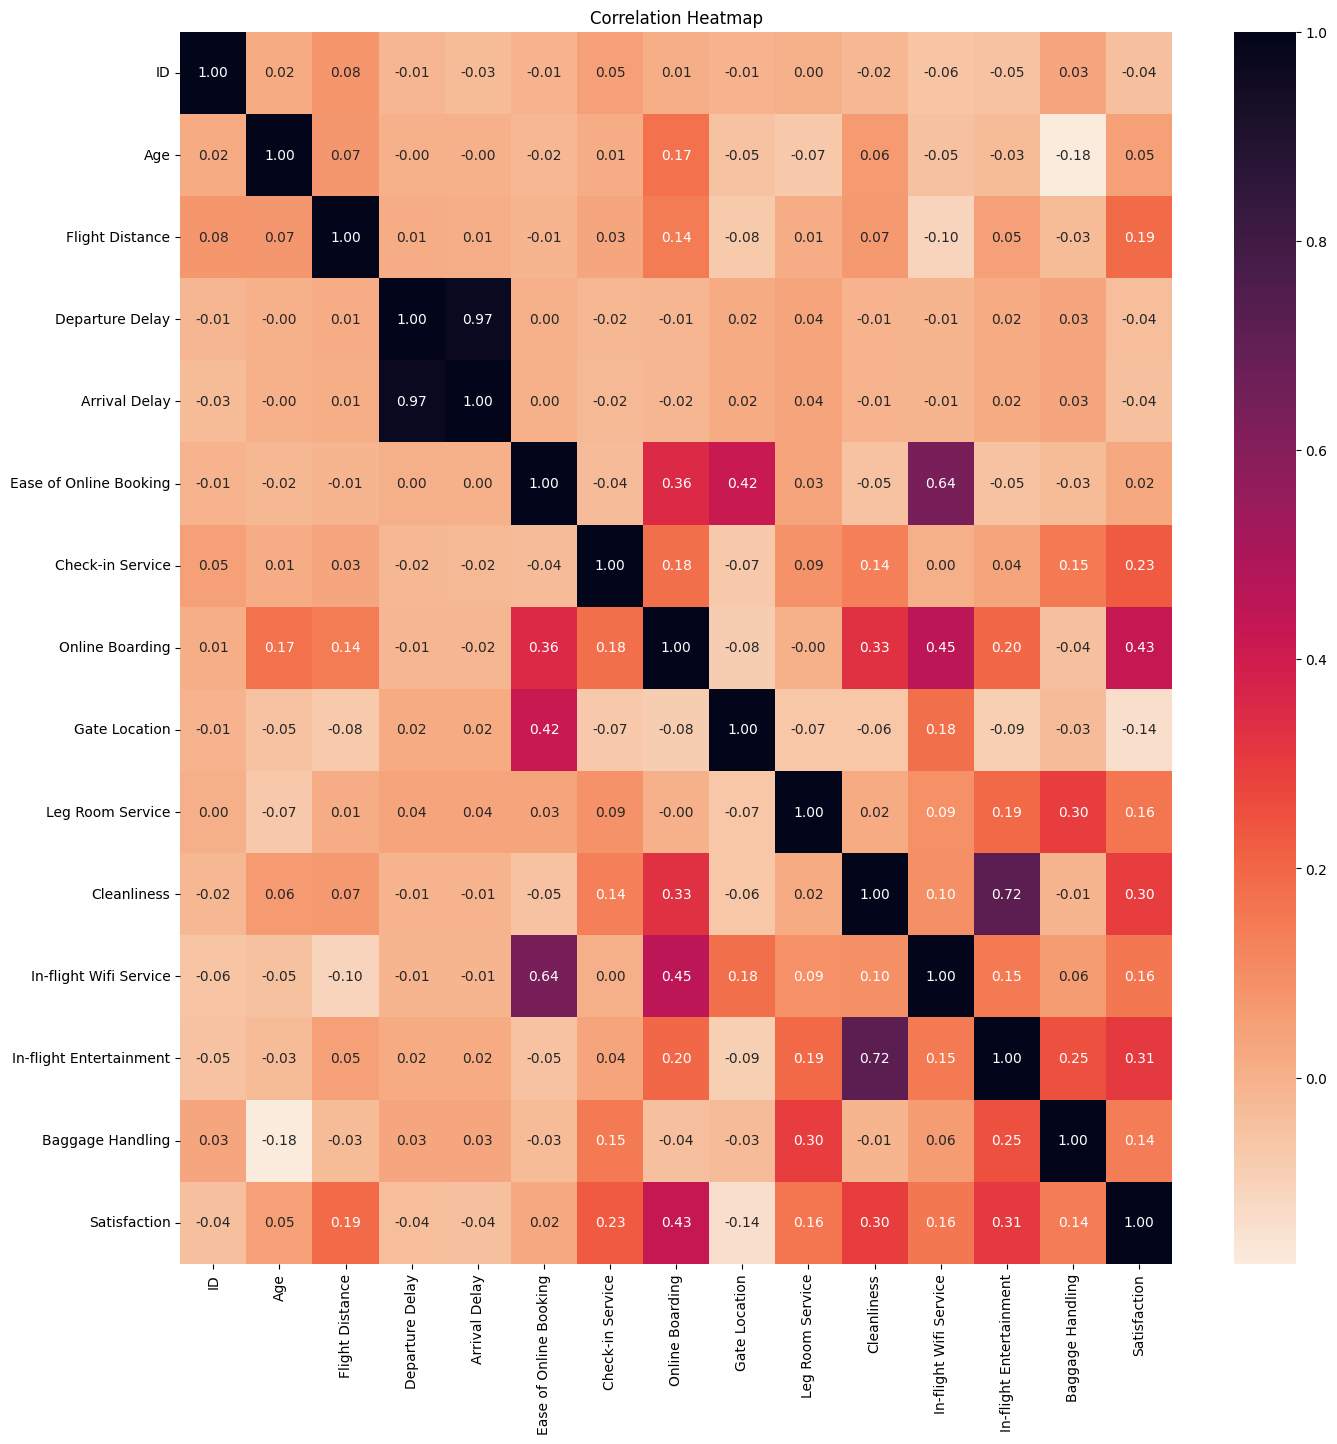

In [ ]:
df_corr_boarding = df_reproduced.corr()

plt.figure(figsize=(16, 16)) 
sns.heatmap(df_corr_boarding, annot=True, cmap='rocket_r', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_stats = df_reproduced.copy()
df_stats = df_stats.drop(columns=[
                    "Arrival Delay",
                    "ID","Distance_Cat","Age_group","Complaint"])
df_stats.head(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,Leg Room Service,Cleanliness,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Female,69,Returning,Business,Business,2673,7,3,2,4,3,3,1,3,3,3,0
1,Female,49,Returning,Personal,Economy,1085,1,2,3,4,3,2,3,2,1,2,0
2,Male,76,Returning,Business,Economy,460,0,4,4,1,4,2,1,1,1,4,0


---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier



# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [ ]:
df_ML = df_stats.copy()

In [ ]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129485 entries, 0 to 129484
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   129485 non-null  object
 1   Age                      129485 non-null  int64 
 2   Customer Type            129485 non-null  object
 3   Type of Travel           129485 non-null  object
 4   Class                    129485 non-null  object
 5   Flight Distance          129485 non-null  int64 
 6   Departure Delay          129485 non-null  int64 
 7   Ease of Online Booking   129485 non-null  int64 
 8   Check-in Service         129485 non-null  int64 
 9   Online Boarding          129485 non-null  int64 
 10  Gate Location            129485 non-null  int64 
 11  Leg Room Service         129485 non-null  int64 
 12  Cleanliness              129485 non-null  int64 
 13  In-flight Wifi Service   129485 non-null  int64 
 14  In-flight Entertainm

In [ ]:
df_ML['Satisfaction'].value_counts(normalize=True)

0    0.696343
1    0.303657
Name: Satisfaction, dtype: float64

In [ ]:
X = df_ML.drop(columns=['Satisfaction'])
y = df_ML['Satisfaction']

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)
\
df_ML = pd.DataFrame(X_resampled, columns=X.columns)
df_ML['Satisfaction'] = y_resampled

In [ ]:
X = df_ML.drop(columns=["Satisfaction"])
y = df_ML['Satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
common_mapping = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}

ordinal_mapping = [
    {'col':'Ease of Online Booking', 'mapping':common_mapping},
    {'col':'Check-in Service', 'mapping':common_mapping},
    {'col':'Online Boarding', 'mapping':common_mapping},
    {'col':'Leg Room Service', 'mapping':common_mapping},
    {'col':'Cleanliness', 'mapping':common_mapping},
    {'col':'In-flight Wifi Service', 'mapping':common_mapping},
    {'col':'In-flight Entertainment', 'mapping':common_mapping},
    {'col':'Baggage Handling', 'mapping':{1:1, 2:2, 3:3, 4:4, 5:5,}},
    {'col':'Class', 'mapping':{"Economy":1, "Economy Plus":2, "Business":3}}
    
]    

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Customer Type', 'Gender','Type of Travel']),
    ('scaler', RobustScaler(), ['Age', 'Flight Distance', 'Departure Delay']),
    ('ordinal', OrdinalEncoder(cols=['Ease of Online Booking',
       'Check-in Service', 'Online Boarding',
       'Leg Room Service', 'Cleanliness',
       'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling','Class'], mapping=ordinal_mapping), ['Ease of Online Booking',
       'Check-in Service', 'Online Boarding',
       'Leg Room Service', 'Cleanliness',
       'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling','Class'])], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Customer Type', 'Gender', 'Type of Travel']),
                                ('scaler', RobustScaler(),
                                 ['Age', 'Flight Distance', 'Departure Delay']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Ease of Online Booking',
                                                      'Check-in Service',
                                                      'Online Boarding',
                                                      'Leg Room Service',
                                                      'Cleanliness',
                                                      'In-flight Wifi Service',
                                                      'In...
dtype: int64},
                                                         {'col': 'Baggage '
                                                                 'Handling',
                                                          'data_type': dtype('int64'),
                                                          'mapping': 1    1
2    2
3    3
4    4
5    5
dtype: int64},
                                                         {'col': 'Class',
                                                          'data_type': dtype('O'),
                                                          'mapping': Economy         1
Economy Plus    2
Business        3
dtype: int64}]),
                                 ['Ease of Online Booking', 'Check-in Service',
                                  'Online Boarding', 'Leg Room Service',
                                  'Cleanliness', 'In-flight Wifi Service',
                                  'In-flight Entertainment', 'Baggage Handling',
                                  'Class'])])

In [ ]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Customer Type', 'Gender', 'Type of Travel']),
                                ('scaler', RobustScaler(),
                                 ['Age', 'Flight Distance', 'Departure Delay']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Ease of Online Booking',
                                                      'Check-in Service',
                                                      'Online Boarding',
                                                      'Leg Room Service',
                                                      'Cleanliness',
                                                      'In-flight Wifi Service',
                                                      'In...
dtype: int64},
                                                         {'col': 'Baggage '
                                                                 'Handling',
                                                          'data_type': dtype('int64'),
                                                          'mapping': 1    1
2    2
3    3
4    4
5    5
dtype: int64},
                                                         {'col': 'Class',
                                                          'data_type': dtype('O'),
                                                          'mapping': Economy         1
Economy Plus    2
Business        3
dtype: int64}]),
                                 ['Ease of Online Booking', 'Check-in Service',
                                  'Online Boarding', 'Leg Room Service',
                                  'Cleanliness', 'In-flight Wifi Service',
                                  'In-flight Entertainment', 'Baggage Handling',
                                  'Class'])])

In [ ]:
f05_score = make_scorer(fbeta_score, beta=0.5)
f2_score = make_scorer(fbeta_score, beta=2)

# Define 7 models that we have chosen for classification modelling.
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42,verbose=0)



#Defineestimator for models
estimators = [
    ('tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('logreg', LogisticRegression(random_state=42)),
    ('random forest', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('cat', CatBoostClassifier(random_state=42,verbose=0))
]


# Name of models
models = {'KNN': knn, 
          'Logistic Regression':logreg, 
          'Decision Tree': tree,
          'xg boost': xgb,  
          'random forest':rf,
          'gradient boosting':gb,
          'catboost':cat
          }



# pName of metrics
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f_0.5': f05_score,
           'f1': 'f1',
           'f2': f2_score}

#variabel to store our result  
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f05_arr = []
test_f1_arr = []
test_f2_arr = []
list_algo = []
list_resample = []

#looping for our model benchmarking
for name_algo,model in models.items():
    crossval = StratifiedKFold(n_splits=5) #5 times validation, stratisfieldKfold used because classification label

    estimator = Pipeline([
        ('transform', transformer),
        ('model', model),
    ])

    scores = cross_validate(estimator,X_train,y_train,cv=crossval, scoring=metrics)
    
    list_algo.append(name_algo)
    test_accuracy_arr.append(scores['test_balanced_accuracy'].mean()) 
    test_precision_arr.append(scores['test_precision'].mean())
    test_recall_arr.append(scores['test_recall'].mean())
    test_f05_arr.append(scores['test_f_0.5'].mean())
    test_f1_arr.append(scores['test_f1'].mean())
    test_f2_arr.append(scores['test_f2'].mean())

# Turn to dataframe
model_bench = pd.DataFrame({
    'model': list_algo,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f_0.5': test_f05_arr,
    'f1': test_f1_arr,
    'f2': test_f2_arr
})

model_bench

,model,accuracy,precision,recall,f_0.5,f1,f2
0,KNN,0.937393,0.926072,0.950694,0.930890,0.938215,0.945661
1,Logistic Regression,0.806697,0.816603,0.791051,0.811359,0.803620,0.796031
2,Decision Tree,0.976654,0.968368,0.985503,0.971747,0.976859,0.982027
3,xg boost,0.961618,0.962082,0.961119,0.961886,0.961595,0.961309
4,random forest,0.984933,0.981365,0.988640,0.982811,0.984988,0.987176
5,gradient boosting,0.924647,0.930059,0.918357,0.927693,0.924168,0.920672
6,catboost,0.964233,0.964406,0.964050,0.964334,0.964226,0.964120


In [ ]:
model_bench_sort = model_bench.sort_values(by='precision',ascending=False)
model_bench_sort

,model,accuracy,precision,recall,f_0.5,f1,f2
4,random forest,0.984933,0.981365,0.988640,0.982811,0.984988,0.987176
2,Decision Tree,0.976654,0.968368,0.985503,0.971747,0.976859,0.982027
6,catboost,0.964233,0.964406,0.964050,0.964334,0.964226,0.964120
3,xg boost,0.961618,0.962082,0.961119,0.961886,0.961595,0.961309
5,gradient boosting,0.924647,0.930059,0.918357,0.927693,0.924168,0.920672
0,KNN,0.937393,0.926072,0.950694,0.930890,0.938215,0.945661
1,Logistic Regression,0.806697,0.816603,0.791051,0.811359,0.803620,0.796031


In [ ]:
# cat as our best model from train data
rf = RandomForestClassifier(random_state=42)

# Initialize lists for etrics
score_accuracy = []
score_precision = []
score_recall = []
score_f_05 = []
score_f1 = []
score_f2 = []

# Create a Pipeline
model = Pipeline([
    ('transform', transformer),
    ('model', cat)
])

# Fit and Evaluate the Model    
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_accuracy.append(accuracy_score(y_test, y_pred))
score_precision.append(precision_score(y_test, y_pred))
score_recall.append(recall_score(y_test, y_pred))
score_f_05.append(fbeta_score(y_test, y_pred,beta=0.5))
score_f1.append(f1_score(y_test, y_pred))
score_f2.append(fbeta_score(y_test, y_pred, beta=2))

# Create and display a dataFrame for model performacne
# we will apply hyperparameter tuning, these will be the values before tuning
score_before_tuning = pd.DataFrame({'Accuracy': score_accuracy, 
                                    'Precision': score_precision, 
                                    'Recall': score_recall, 
                                    'F_0.5': score_f_05,
                                    'F1': score_f1,
                                    'F2': score_f2}, 
                                    index=['randomforest Test score']) 
score_before_tuning

,Accuracy,Precision,Recall,F_0.5,F1,F2
randomforest Test score,0.96756,0.967128,0.968022,0.967307,0.967575,0.967843


In [ ]:
model['model'].feature_importances_

array([ 5.91103533,  0.20025099, 12.99728622,  4.39992907,  3.24929127,
        1.37260774,  2.56040402,  4.28496595,  6.80281338,  1.81422009,
        2.51742006, 35.15466204,  3.29607596,  4.47268729,  5.34110105,
        5.62524954])

In [ ]:
model.named_steps['transform'].get_feature_names_out()

array(['onehot__Customer Type_Returning', 'onehot__Gender_Male',
       'onehot__Type of Travel_Personal', 'scaler__Age',
       'scaler__Flight Distance', 'scaler__Departure Delay',
       'ordinal__Ease of Online Booking', 'ordinal__Check-in Service',
       'ordinal__Online Boarding', 'ordinal__Leg Room Service',
       'ordinal__Cleanliness', 'ordinal__In-flight Wifi Service',
       'ordinal__In-flight Entertainment', 'ordinal__Baggage Handling',
       'ordinal__Class', 'remainder__Gate Location'], dtype=object)

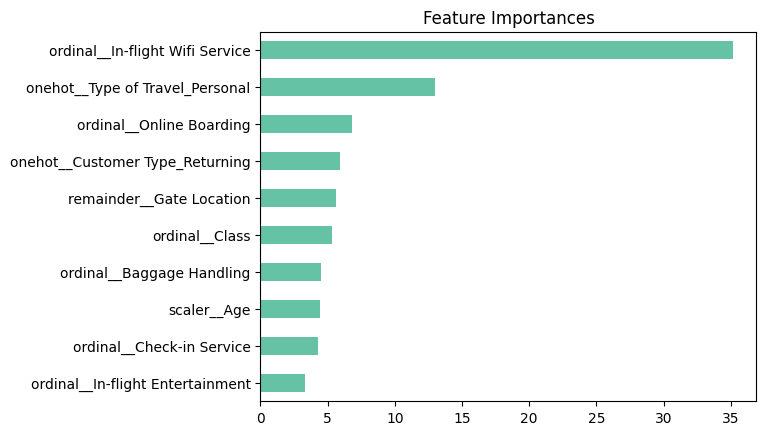

In [ ]:
import matplotlib.cm as cm
feature = pd.Series(model['model'].feature_importances_, model.named_steps['transform'].get_feature_names_out()).sort_values(ascending = False).head(10)
feature = feature.iloc[::-1]
cmap = cm.get_cmap('Set2_r')
feature.plot(kind='barh', title='Feature Importances',color=cmap(feature))
plt.show()